In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('NVDA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376358,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000
...,...,...,...,...,...,...,...
6117,2023-05-15,285.079987,289.690002,281.519989,289.529999,289.529999,29392600
6118,2023-05-16,288.410004,298.700012,288.320007,292.130005,292.130005,44940500
6119,2023-05-17,295.839996,301.989990,294.299988,301.779999,301.779999,43253500
6120,2023-05-18,304.100006,318.279999,303.200012,316.779999,316.779999,74872500


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

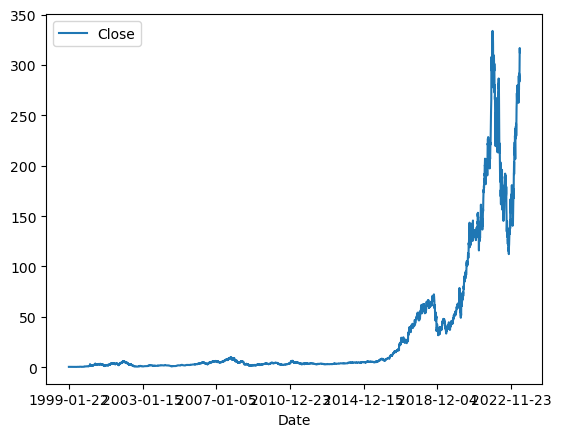

In [9]:
df.plot.line(y="Close", use_index=True)

In [11]:
df["Tomorrow"]= df["Close"].shift(-1)

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376358,271468800,0.453125
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000,0.417969
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000,0.416667
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800,0.415365
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000,0.395833
...,...,...,...,...,...,...,...
2023-05-15,285.079987,289.690002,281.519989,289.529999,289.529999,29392600,292.130005
2023-05-16,288.410004,298.700012,288.320007,292.130005,292.130005,44940500,301.779999
2023-05-17,295.839996,301.989990,294.299988,301.779999,301.779999,43253500,316.779999


In [15]:
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376358,271468800,0.453125,1
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000,0.417969,0
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000,0.416667,0
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800,0.415365,0
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000,0.395833,0
...,...,...,...,...,...,...,...,...
2023-05-15,285.079987,289.690002,281.519989,289.529999,289.529999,29392600,292.130005,1
2023-05-16,288.410004,298.700012,288.320007,292.130005,292.130005,44940500,301.779999,1
2023-05-17,295.839996,301.989990,294.299988,301.779999,301.779999,43253500,316.779999,1


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
#creating model
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 100, random_state = 1)

#spliting data into what rows will be for testing and training 
train = df.iloc[:-100]
test = df.iloc[-100:]

#creating a list for all columns that will be used by model
predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [23]:
from sklearn.metrics import precision_score

#measuring the preformance

preds = model.predict(test[predictors])


In [25]:
preds = pd.Series(preds, index = test.index)

In [27]:
preds

Date
2022-12-27    1
2022-12-28    1
2022-12-29    1
2022-12-30    1
2023-01-03    1
             ..
2023-05-15    1
2023-05-16    1
2023-05-17    0
2023-05-18    0
2023-05-19    0
Length: 100, dtype: int32

In [29]:
#calculating precsion score

precision_score(test["Target"], preds)

0.6

In [31]:
#comparing actual values to predicted values

combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

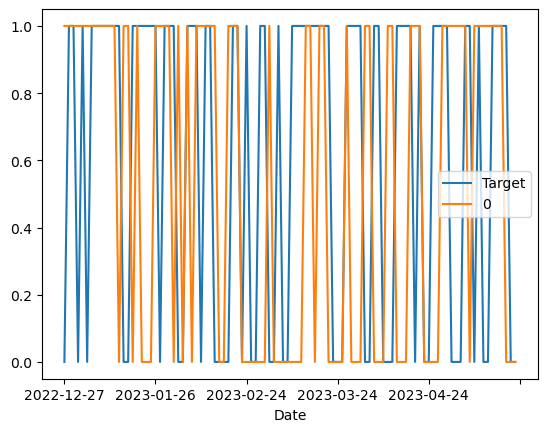

In [33]:
combined.plot()

In [35]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [37]:
#creating backtesting system

def backtest(df, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for  i in range(start, df.shape[0], step):
        train = df.iloc[0:i].copy()
        test = df.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [39]:
predictions = backtest(df, model, predictors)

In [41]:
predictions["Predictions"].value_counts()

Predictions
0    1940
1    1682
Name: count, dtype: int64

In [43]:
precision_score(test["Target"], preds)

0.6

In [45]:
predictions["Target"].value_counts() / predictions.shape[0]

#actually went up 52% of the time

Target
1    0.527057
0    0.472943
Name: count, dtype: float64

In [53]:
horizon = [2,5,60,250,1000] 

new_predictors = []

for horizon in horizon:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [57]:
df = df.dropna()

In [60]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2003-01-15,1.030833,1.039167,0.998333,0.998333,0.916067,90458400,0.930833,0,0.984388,1.0,0.979719,3.0,0.906374,32.0,0.453887,104.0,0.474866,470.0
2003-01-16,0.983333,0.995833,0.917500,0.930833,0.854129,203997600,0.895833,0,0.965011,0.0,0.928512,2.0,0.844112,31.0,0.426601,104.0,0.442659,469.0
2003-01-17,0.905833,0.918333,0.884167,0.895833,0.822013,105883200,0.873333,0,0.980839,0.0,0.918332,1.0,0.812209,30.0,0.413813,104.0,0.425918,469.0
2003-01-21,0.912500,0.931667,0.870833,0.873333,0.801367,96735600,0.874167,1,0.987282,0.0,0.923511,1.0,0.792348,29.0,0.406732,103.0,0.415130,469.0
2003-01-22,0.870833,0.896667,0.868333,0.874167,0.802132,55099200,0.898333,1,1.000477,1.0,0.955896,1.0,0.793075,30.0,0.410636,103.0,0.415436,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12,285.290009,287.799988,280.459991,283.399994,283.399994,27402700,289.529999,1,0.995819,0.0,0.987284,2.0,1.092477,33.0,1.531269,134.0,1.899527,543.0
2023-05-15,285.079987,289.690002,281.519989,289.529999,289.529999,29392600,292.130005,1,1.010699,1.0,1.010033,2.0,1.111145,34.0,1.560449,135.0,1.937325,544.0
2023-05-16,288.410004,298.700012,288.320007,292.130005,292.130005,44940500,301.779999,1,1.004470,2.0,1.014559,3.0,1.115540,35.0,1.570725,135.0,1.951376,545.0


In [62]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [64]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [66]:
predictions = backtest(df, model, new_predictors)

In [68]:
predictions["Predictions"].value_counts()

Predictions
0.0    2390
1.0     231
Name: count, dtype: int64

In [74]:
precision_score(predictions["Target"], predictions["Predictions"])

#model will go up 57% of the time

0.5714285714285714